# 📈 ПРОЕКТ 📊

# 🔍 АНАЛИЗ ДАТАСЕТА В КОНТЕКСТЕ NLP 🔎

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li>
        <li><span><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование датасета</a></span></li>
        <li><span><span class="toc-item-num">3&nbsp;&nbsp;</span>Токенизация и обучение модели</a></span></li>
        <li><span><span class="toc-item-num">4&nbsp;&nbsp;</span>Вычисление метрик и визуализация</a></span></li>
        <li><span><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод по исследованию</a></span></li>
    </ul>

# 📝 Описание проекта:  

<div style="border:solid green 3px; padding: 20px">
    
В рамках проекта мы исследуем датасет с корпусом текстов с указанием тэгов. Обучим модель, вычислим метрики и визуализируем выходные данные. По окончании проекта сделаем общий вывод.


# 📂 Описание данных:

<div style="border:solid green 3px; padding: 20px">

Нам дан датасет с портала Hugging Face под названием 'graviada/russian-ner-runne', предназначенный для задач распознавания именованных сущностей на русском языке.

# 🎯 Цель проекта:

<div style="border:solid green 3px; padding: 20px">
    
Обучить на предоставленном датасете модель для выполнения задачи NER в рамках NLP.


# 📅 План действий:

<div style="border:solid green 3px; padding: 20px">

1. Загрузить все необходимые для проекта библиотеки;
2. Исследовать и описать датасет;
3. Провести токенизацию корпусов текстов;
4. Обучить модель и рассчитать метрики качества;
5. Провести визуализацию полученных данных;
6. Сделать вывод по результатам проекта.


## Загрузка данных

<div style="border:solid green 2px; padding: 5px">
    
    установим необходимые библиотеки для работы с моделью обработки естественного языка:


In [12]:
!pip install spacy==3.8.0 -qq
!pip install datasets -qq
!pip install tensorflow transformers -qq
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 84.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<div style="border:solid green 2px; padding: 5px">
    
    импортируем необходимые библиотеки:




In [13]:
import torch
import spacy
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForTokenClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, classification_report
from datasets import load_dataset

<div style="border:solid green 2px; padding: 5px">
    
    выгружаем датасет и сохраняем его в переменную:

In [14]:
ds = load_dataset("graviada/russian-ner-runne")

<div style="border:solid green 2px; padding: 5px">
    
    напечатаем общую структуру датасета:

In [15]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 2508
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 512
    })
    dev: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 536
    })
})


<div style="border:solid green 2px; padding: 5px">
    
    видим, что датасет в виде словаря состоит из трёх блоков - train, test и dev;
    test и dev содержат примерно по 20% от тренировочного набора;
    данные всех блоков разделены на токены и метки;
    
    напишем функцию, которая отобразит тексты с соответствующими тэгами на каждом из трёх поддатасетов в наборе, на печать выведем по три корпуса с каждого набора:

In [16]:
num_to_print = 3

all_datasets = {
    "Train": ds['train'],
    "Dev": ds['dev'],
    "Test": ds['test']
}

for dataset_name, dataset in all_datasets.items():
    print(f"--- {dataset_name} Dataset ---")
    for i in range(min(num_to_print, len(dataset))):
        print(f"Токены: {dataset[i]['tokens']}")
        print(f"Тэги: {dataset[i]['tags']}")
        print()

--- Train Dataset ---
Токены: ['Нурсултан', 'Назарбаев', 'назначил', 'дату', 'внеочередных', 'президентских', 'выборов', 'Согласно', 'опубликованному', 'указу', 'о', 'проведении', 'выборов', 'правительству', 'и', 'Центризбиркому', 'Казахстана', 'поручено', 'принять', 'необходимые', 'меры', 'по', 'организационному', 'и', 'финансовому', 'обеспечению', 'внеочередных', 'президентских', 'выборов']
Тэги: [44, 45, 0, 0, 0, 48, 17, 0, 0, 0, 0, 0, 18, 38, 0, 38, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 17]

Токены: ['Отметим', 'также', 'что', 'Нурсултан', 'Назарбаев', 'подписал', 'ранее', 'принятый', 'парламентом', 'конституционный', 'закон', 'О', 'внесении', 'дополнений', 'и', 'изменений', 'в', 'некоторые', 'конституционные', 'законы', 'Республики', 'Казахстан', 'конституционные', 'законы', 'Республики', 'Казахстан', 'устанавливающий', 'возможность', 'проведения', 'в', 'Казахстане', 'внеочередных', 'президентских', 'выборов']
Тэги: [0, 0, 0, 44, 45, 18, 0, 0, 38, 26, 27, 26, 27, 27, 27, 27, 27, 27


<div style="border:solid green 2px; padding: 5px">
    
    посчитаем, сколько уникальных тэгов во всех трёх блоках, для этого создадим функцию, которая будет проходить по каждому набору данных в датасете и записывать все уникальные тэги и выведет отсортированный список, также сохраним в переменную и выведем общее количество уникальных тэгов:

In [17]:
unique_tags = set()

for split in ds.keys():
    for entry in ds[split]:
        unique_tags.update(entry['tags'])

unique_tags_list = sorted(list(unique_tags))
num_labels = len(unique_tags_list)

print("Уникальные метки:")
print(unique_tags_list)
print("Количество уникальных меток:")
print(num_labels)

Уникальные метки:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
Количество уникальных меток:
58


<div style="border:solid green 2px; padding: 5px">
    
    так как информации о наименовании меток у нас нет, выведем список каждой метки; для этого при помощи функции, которая будет проходить по каждому тэгу, к каждому тэгу припишет соотносящиеся слова из корпуса текстов и напечатаем на экране каждую цифру метки со словами (для примера выведем первые три метки):

In [18]:
def get_tokens_by_tags(dataset_dict, tags_range):
    tokens_with_tags = {tag: [] for tag in tags_range}

    for split in dataset_dict:
        dataset = dataset_dict[split]

        for entry in dataset:
            tokens = entry['tokens']
            tags = entry['tags']

            for token, token_tag in zip(tokens, tags):
                if token_tag in tags_range:
                    tokens_with_tags[token_tag].append(token)

    return tokens_with_tags

tags_to_find = [1, 2, 3]
tokens_by_tags = get_tokens_by_tags(ds, tags_to_find)

for tag, tokens in tokens_by_tags.items():
    print(f"Токены с тегом {tag}: {tokens}")

Токены с тегом 1: ['годовщины', '18', 'лет', 'лет', 'один', 'год', 'лет', '20', 'лет', 'лет', 'лет', 'лет', 'году', 'лет', 'лет', 'год', 'года', 'лет', 'лет', 'лет', 'года', 'года', 'лет', 'года', 'лет', 'лет', 'год', 'года', 'лет', 'года', 'год', 'возраста', 'летний', 'лет', 'подростковом', 'возрасте', 'лет', 'тысяч', 'лет', 'годовщины', '50', 'лет', '45', 'лет', 'лет', 'лет', 'лет', 'лет', 'лет', 'лет', 'года', 'лет', 'лет', 'лет', 'лет', 'младше', '45', 'лет', 'год', 'младше', '45', 'лет', 'годовщине', 'годовщине', 'года', 'лет', 'лет', 'лет', 'год', 'года', 'года', 'годовщина', 'лет', 'лет', 'лет', 'годовщины', 'году', 'лет', 'году', 'год', 'год', 'лет', 'года', 'год', 'летний', 'года', 'лет', '35', 'лет', 'летний', 'лет', 'лет', 'лет', 'лет', 'лет', 'года', 'младше', '45', 'лет', '29', 'лет', 'лет', 'летний', 'лет', 'лет', 'лет', 'лет', 'года', 'лет', 'и', '359', 'дней', 'лет', 'лет', '100', 'лет', 'лет', '6', 'до', '18', 'лет', 'лет', 'лет', 'лет', 'летний', 'лет', 'год', 'лет', 

<div style="border:solid green 2px; padding: 5px">
    
    на основании полученных данных из текстов впишем определение меток в виде лэйблов, далее создадим словари для преобразования меток в идентификаторы и обратно, напечатаем примеры для проверки:

In [19]:
labels = [
    "O", "B-AGE", "I-AGE", "B-AWARD", "I-AWARD",
    "B-GEO", "I-GEO", "B-COUNTRY", "I-COUNTRY",
    "B-CRIMES", "I-CRIMES", "B-DATE", "I-DATE",
    "B-DISEASE", "I-DISEASE", "B-DISTRICT", "I-DISTRICT",
    "B-MISC", "I-MISC", "B-PLACES", "I-PLACES",
    "B-FAMILY", "I-FAMILY", "B-PARTY", "I-PARTY",
    "B-LANG", "B-LAW", "I-LAW", "B-LOC", "I-LOC",
    "B-NUM", "I-NUM", "B-NATION", "I-NATION",
    "B-NEAR", "I-NEAR", "B-ORDINAL", "I-ORDINAL",
    "B-ORG", "I-ORG", "B-CASE", "I-CASE",
    "B-PERCENT", "I-PERCENT", "B-PER", "I-PER",
    "B-NET", "I-NET", "B-PROF", "I-PROF",
    "B-RELIGION", "I-RELIGION", "B-STATE", "I-STATE",
    "B-TIME", "I-TIME", "B-TITLE", "I-TITLE"
]

label_to_id = {label: i for i, label in enumerate(labels)}
id_to_label = {i: label for i, label in enumerate(labels)}

print(f"Метка '{labels[1]}' соответствует ID:", label_to_id['B-AGE'])
print(f"ID '{labels[56].index}' соответствует метке:", id_to_label[57])

Метка 'B-AGE' соответствует ID: 1
ID '<built-in method index of str object at 0x7f1e40343df0>' соответствует метке: I-TITLE


<div style="border:solid green 2px; padding: 5px">
    
    модель будем использовать "DeepPavlov/rubert-base-cased", данная модель работает с русскими текстами, также в переменную запишем токенайзер:

In [20]:
pt_model = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(pt_model, clean_up_tokenization_spaces=True)

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

<div style="border:solid green 2px; padding: 5px">
    
    проверим работу токенайзера на строках стихотворения:

In [21]:
sample_verse = "Светла над миром, как звезда, Родина моя!"

tokens = tokenizer.tokenize(sample_verse)
print("Токены:", tokens)

token_ids = tokenizer.encode(sample_verse)
print("Идентификаторы токенов:", token_ids)

Токены: ['Светл', '##а', 'над', 'миром', ',', 'как', 'звезда', ',', 'Родина', 'моя', '!']
Идентификаторы токенов: [101, 44285, 626, 4700, 31912, 128, 2739, 22826, 128, 35408, 35125, 106, 102]


<div style="border:solid green 2px; padding: 5px">
    
    загрузим предобученную модель для токенов с классификацией, приведём все параметры модели к смежному формату памяти для оптимизации работы с тензорами в PyTorch:

In [22]:
model = AutoModelForTokenClassification.from_pretrained(pt_model, num_labels=num_labels)
for param in model.parameters():
  param.data = param.data.contiguous()

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<div style="border:solid green 2px; padding: 5px">
    
    напишем функцию, которая нормализует тэги, что потребуется для обучения модели, затем токенизирует входные примеры и выровнит метки;
    метки, выходящие за пределы допустимого диапазона, изменяются на -100 для последующего использования в обучении модели, затем функция возвращает словарь с токенизированными данными и соответствующими метками, далее через лямбда-функцию проводим токенизацию и сохраняем в переменную:

In [23]:
def normalize_labels(labels, num_labels):
    return [min(max(label, 0), num_labels - 1) for label in labels]

def tokenize_and_align_labels(examples, tokenizer, num_labels):
    tokenized_inputs = tokenizer(
        examples['tokens'],
        truncation=True,
        padding='max_length',
        max_length=512,
        is_split_into_words=True
    )

    labels = []
    for i, label in enumerate(examples['tags']):
        label_ids = normalize_labels(label + [-100] * (len(tokenized_inputs['input_ids'][i]) - len(label)), num_labels)
        labels.append(torch.tensor(label_ids).contiguous())

    tokenized_inputs['labels'] = torch.stack(labels)
    return tokenized_inputs

tokenized_datasets = ds.map(lambda examples: tokenize_and_align_labels(examples, tokenizer, num_labels), batched=True)

Map:   0%|          | 0/2508 [00:00<?, ? examples/s]

Map:   0%|          | 0/512 [00:00<?, ? examples/s]

Map:   0%|          | 0/536 [00:00<?, ? examples/s]

<div style="border:solid green 2px; padding: 5px">
    
    посмотрим на результат токенизации, для этого напишем функцию, которая выведет список уникальных меток и их количество по каждому поднабору данных:

In [24]:
unique_labels = set()

for split in ['train', 'test', 'dev']:
    for example in tokenized_datasets[split]:
        unique_labels.update(example['labels'])

print(unique_labels)
print(len(unique_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57}
58


<div style="border:solid green 2px; padding: 5px">
    
    задаём гиперпараметры для модели, достаточные для обучения в пределах заданных значений ОЗУ:

In [25]:
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    gradient_accumulation_steps=2,
    logging_steps=100,
)

<div style="border:solid green 2px; padding: 5px">
    
    запускаем обучение модели на тренировочной и валидационных выборках, сохраняем в переменную:

In [26]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['dev'],
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,0.264500,0.113659
2,0.098400,0.096213
3,0.092000,0.091432


TrainOutput(global_step=471, training_loss=0.13396909535563928, metrics={'train_runtime': 787.6687, 'train_samples_per_second': 9.552, 'train_steps_per_second': 0.598, 'total_flos': 1966992167264256.0, 'train_loss': 0.13396909535563928, 'epoch': 3.0})

<div style="border:solid green 2px; padding: 5px">
    
    сделаем предсказание меток на тестовом наборе данных с использованием обученной модели, преобразуем метки в плоские списки, генерируем и печатаем отчёт о классификации:

In [27]:
predictions = trainer.predict(tokenized_datasets['test'])
y_pred = predictions.predictions.argmax(-1)

predicted_labels = [[id_to_label[label] for label in pred if label != -100] for pred in y_pred]

y_true = [tags for tags in tokenized_datasets['test']['labels']]

true_flat = [id_to_label[tag] for sublist in y_true for tag in sublist if tag != -100]
pred_flat = [tag for sublist in predicted_labels for tag in sublist]

report = classification_report(true_flat, pred_flat, zero_division=0, output_dict=True)

if "O" in report:
    del report["O"]

print("Отчёт о классификации:", report)

Отчёт о классификации: {'B-AGE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 62.0}, 'B-AWARD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 78.0}, 'B-CASE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11.0}, 'B-COUNTRY': {'precision': 0.3346938775510204, 'recall': 0.24260355029585798, 'f1-score': 0.28130360205831906, 'support': 338.0}, 'B-CRIMES': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 24.0}, 'B-DATE': {'precision': 0.42953020134228187, 'recall': 0.15274463007159905, 'f1-score': 0.22535211267605634, 'support': 419.0}, 'B-DISEASE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 45.0}, 'B-DISTRICT': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0}, 'B-FAMILY': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'B-GEO': {'precision': 0.2, 'recall': 0.017241379310344827, 'f1-score': 0.031746031746031744, 'support': 174.0}, 'B-LANG': {'precision': 0.0, 'recall': 0.0

<div style="border:solid green 2px; padding: 5px">
    
    визуализируем данные по метрикам на столбчатой диаграмме:

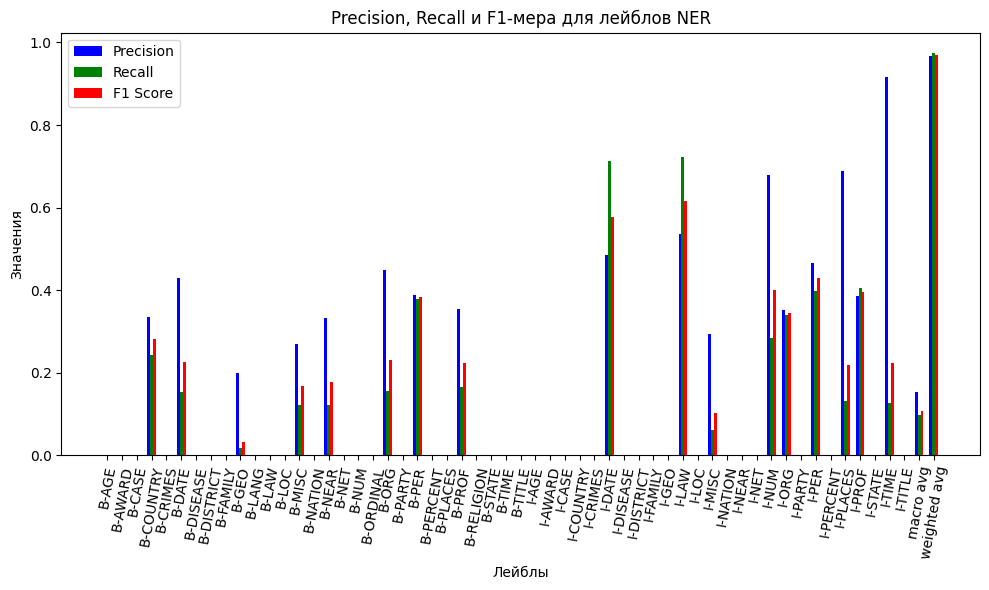

In [28]:
precision = []
recall = []
f1_score = []
labels_vis = []

for label, metrics in report.items():
    if isinstance(metrics, dict):
        labels_vis.append(label)
        precision.append(metrics['precision'])
        recall.append(metrics['recall'])
        f1_score.append(metrics['f1-score'])

plt.figure(figsize=(10, 6))
x = range(len(labels_vis))

plt.bar(x, precision, width=0.2, label='Precision', color='b', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', color='g', align='center')
plt.bar([p + 0.4 for p in x], f1_score, width=0.2, label='F1 Score', color='r', align='center')

plt.xticks([p + 0.2 for p in x], labels_vis, rotation=80)
plt.xlabel('Лейблы')
plt.ylabel('Значения')
plt.title('Precision, Recall и F1-мера для лейблов NER')
plt.legend()
plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 5px">
    
    видим, что модель лучше всего справляется с такими тэгами, как DATE, LAW, NUM, PER, TIME

    для просмотра результатов предсказаний, выведем ограниченное количество корпусов текстов и посмотрим, как модель распределила парсинг и NER (для примера, сделаем фильтр по частям речи):

In [29]:
nlp = spacy.load("ru_core_news_sm")

max_sentences = 5

for i in range(min(len(predicted_labels), max_sentences)):
    text = " ".join(ds['test']['tokens'][i])
    doc = nlp(text)

    print(f"Предложение: {text}")
    print("Результаты NER:")

    for entity in doc.ents:
        print(f" - {entity.text}: {entity.label_}")
    print()
    print("Результаты парсинга:")

    for token in doc:
        if token.pos_ in {"NOUN", "VERB"}:
            print(f'Текст: {token.text}, Часть речи: {token.pos_}, Зависимость: {token.dep_}, Ключевое слово: {token.head.text}')

    print("\n" + "="*50 + "\n")

Предложение: Рэпер Децл умер после концерта в Ижевске Кирилл Децл Толмацкий Децл Толмацкий в 2007 году
Результаты NER:
 - Децл: PER
 - Ижевске: LOC
 - Кирилл Децл Толмацкий: PER
 - Децл Толмацкий: PER

Результаты парсинга:
Текст: Рэпер, Часть речи: NOUN, Зависимость: nsubj, Ключевое слово: умер
Текст: умер, Часть речи: VERB, Зависимость: ROOT, Ключевое слово: умер
Текст: концерта, Часть речи: NOUN, Зависимость: obl, Ключевое слово: умер
Текст: году, Часть речи: NOUN, Зависимость: obl, Ключевое слово: умер


Предложение: Фото Александра Плющева 3 февраля 2019 года в 6 часов утра по московскому времени 3 февраля 2019 года в 6 часов утра по московскому времени отец рэпера Кирилла Толмацкого больше известного как Децл сообщил о смерти артиста
Результаты NER:
 - Александра Плющева: PER
 - Кирилла Толмацкого: PER
 - Децл: PER

Результаты парсинга:
Текст: Фото, Часть речи: NOUN, Зависимость: nsubj, Ключевое слово: сообщил
Текст: февраля, Часть речи: NOUN, Зависимость: flat, Ключевое слово: 3


<div style="border:solid green 4px; padding: 15px">

# ИТОГОВЫЙ ВЫВОД:

##1. Загрузка данных:
    
    а) Подгрузили необходимые библиотеки;
    
    б) Изучили структуру датасета;
    
    в) Провели предобработку тэгов датасета;
    
##2. Загрузка модели:
    
    а) Выбрали модель для обучения;
    
    б) Реализовали и проверили токенайзер;
    
    в) Загрузили и настроили предобученную модель;

##3. Подготовка данных:

    а) Нормализовали тэги в выборках;
    
    б) Провели токенизацию датасета;
    
    в) Проверили результат токенизации;
    
##4. Обучение модели:

    а) Подобрали подходящие гиперпараметры;
    
    б) Обучили модель на данных;
    
    в) Вывели отчёт о классификации;

##5. Дополнительная обработка:

    а) Визуализировали метрики качества;
    
    б) Провели парсинг и процедуру NER;
    
    в) Написали итоговый вывод.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">

# ЗАКЛЮЧЕНИЕ:

    Модель обучилась на трёх эпохах, в результате третьей эпохи loss составил	9.2% и	9.14% на тренировочной и валидационных выборках соответственно.
    По результатам исследования датасета можем выделить, что прогнозируемость модели к меткам различна, лучшие метки по предсказанию - DATE, LAW, NUM, PER, TIME.
    Также был проведён парсинг и NER данных, выгрузили какое-то число предложений с разбором от модели, где она успешно справилась с обработкой текста.

    Что можно улучшить:
    Можно было бы подобрать наиболее оптимальные гиперпараметры для модели, однако ограниченные ресурсы сервера позволили обучиться только на текущих.